#### Objective
The objective of this project is to cluster the most streamed songs on Spotify based on their characteristics using the K-Means algorithm.

- The dataset containing the top 953 streamed songs was loaded into a DataFrame for analysis.

- The structure and content of the dataset were examined to understand its features and dimensions.

- Data Preprocessing: Relevant numeric columns were selected for clustering, focusing on features such as streams, BPM (beats per minute), and various musical attributes (danceability, valence, energy, acousticness, instrumentalness, liveness, and speechiness).

- Data Normalization: The selected data was scaled using the StandardScaler to ensure that all features contributed equally to the clustering process.

- Applying K-Means: The K-Means clustering algorithm was implemented with three clusters, allowing the model to categorize the songs based on their characteristics.

- Analyzing Results: The cluster labels assigned by the K-Means algorithm were added to the original DataFrame for further analysis.

- Visualization: A scatter plot was created to visualize the clusters, displaying the relationship between the number of streams and BPM for the songs.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/Users/simarmalhan/Downloads/Spotify Most Streamed Songs.csv')

In [4]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [5]:
print(df.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
df_numeric = df[['streams', 'bpm', 'energy_%']]

In [8]:
print(df.dtypes)

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object


In [10]:
df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors = 'coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors = 'coerce')

print(df[['streams', 'bpm', 'energy_%']].isnull().sum())

streams     1
bpm         0
energy_%    0
dtype: int64


In [11]:
df_numeric = df[['streams', 'bpm', 'energy_%']].dropna()

In [12]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [15]:
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [16]:
print(len(df))
print(len(df_numeric))
print(len(df_scaled))

953
952
952


In [17]:
df_numeric_clean = df_numeric.dropna()

In [18]:
df_scaled = scaler.fit_transform(df_numeric_clean)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [19]:
df_clean = df.loc[df_numeric_clean.index]
df_clean['Cluster'] = kmeans.labels_

In [20]:
print(f"Row numbers in the original dataframe: {len(df)}")
print(f"Row numbers in the numeric dataframe: {len(df_numeric)}")
print(f"Row numbers in the scaled dataframe: {len(df_scaled)}")

Row numbers in the original dataframe: 953
Row numbers in the numeric dataframe: 952
Row numbers in the scaled dataframe: 952


In [21]:
df_scaled = scaler.fit_transform(df_numeric_clean)
kmeans.fit(df_scaled)
print(f"Generated label numbers: {len(kmeans.labels_)}")

Generated label numbers: 952


#### Scatterplot to visualize the clusters

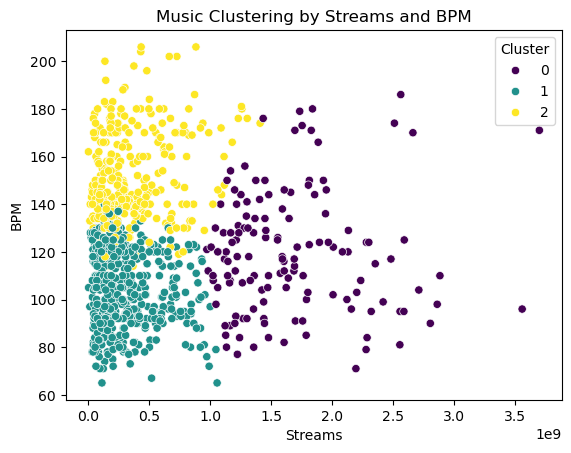

In [26]:
sns.scatterplot(df_clean, x = 'streams', y = 'bpm', hue = 'Cluster', palette = 'viridis', legend = 'full')

plt.xlabel('Streams')
plt.ylabel('BPM')
plt.title('Music Clustering by Streams and BPM')

plt.legend(title='Cluster')

plt.show()